In [4]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
im_1_path ='C:/Users/ASUS/Desktop/My Project 1/image1.jpg'

In [6]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [7]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
result

[([[250, 539], [2131, 539], [2131, 739], [250, 739]],
  'Life is like riding a bicycle:',
  0.6785459736461381),
 ([[246, 709], [1807, 709], [1807, 932], [246, 932]],
  'To keep your balance,',
  0.898354522992991),
 ([[244, 911], [1894, 911], [1894, 1105], [244, 1105]],
  'you must keep moving:',
  0.8965773999219863),
 ([[424, 1326], [540, 1326], [540, 1378], [424, 1378]],
  '32',
  0.152867429141439),
 ([[1337, 1529], [1423, 1529], [1423, 1597], [1337, 1597]],
  'S',
  0.16959313046790303),
 ([[1415, 1483], [2311, 1483], [2311, 1620], [1415, 1620]],
  'Albert Einstein',
  0.9996904251613911),
 ([[2224, 2260], [2464, 2260], [2464, 2412], [2224, 2412]],
  'RD',
  0.9999398148308071)]

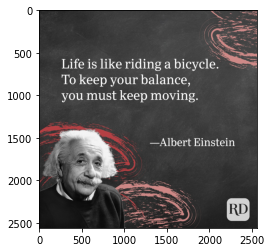

In [9]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [10]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Life is like riding a bicycle: (Probability: 0.68)
Detected text: To keep your balance, (Probability: 0.90)
Detected text: you must keep moving: (Probability: 0.90)
Detected text: Albert Einstein (Probability: 1.00)
Detected text: RD (Probability: 1.00)


FileNotFoundError: [Errno 2] No such file or directory: './output/image1_overlay.jpg'

<Figure size 432x288 with 0 Axes>

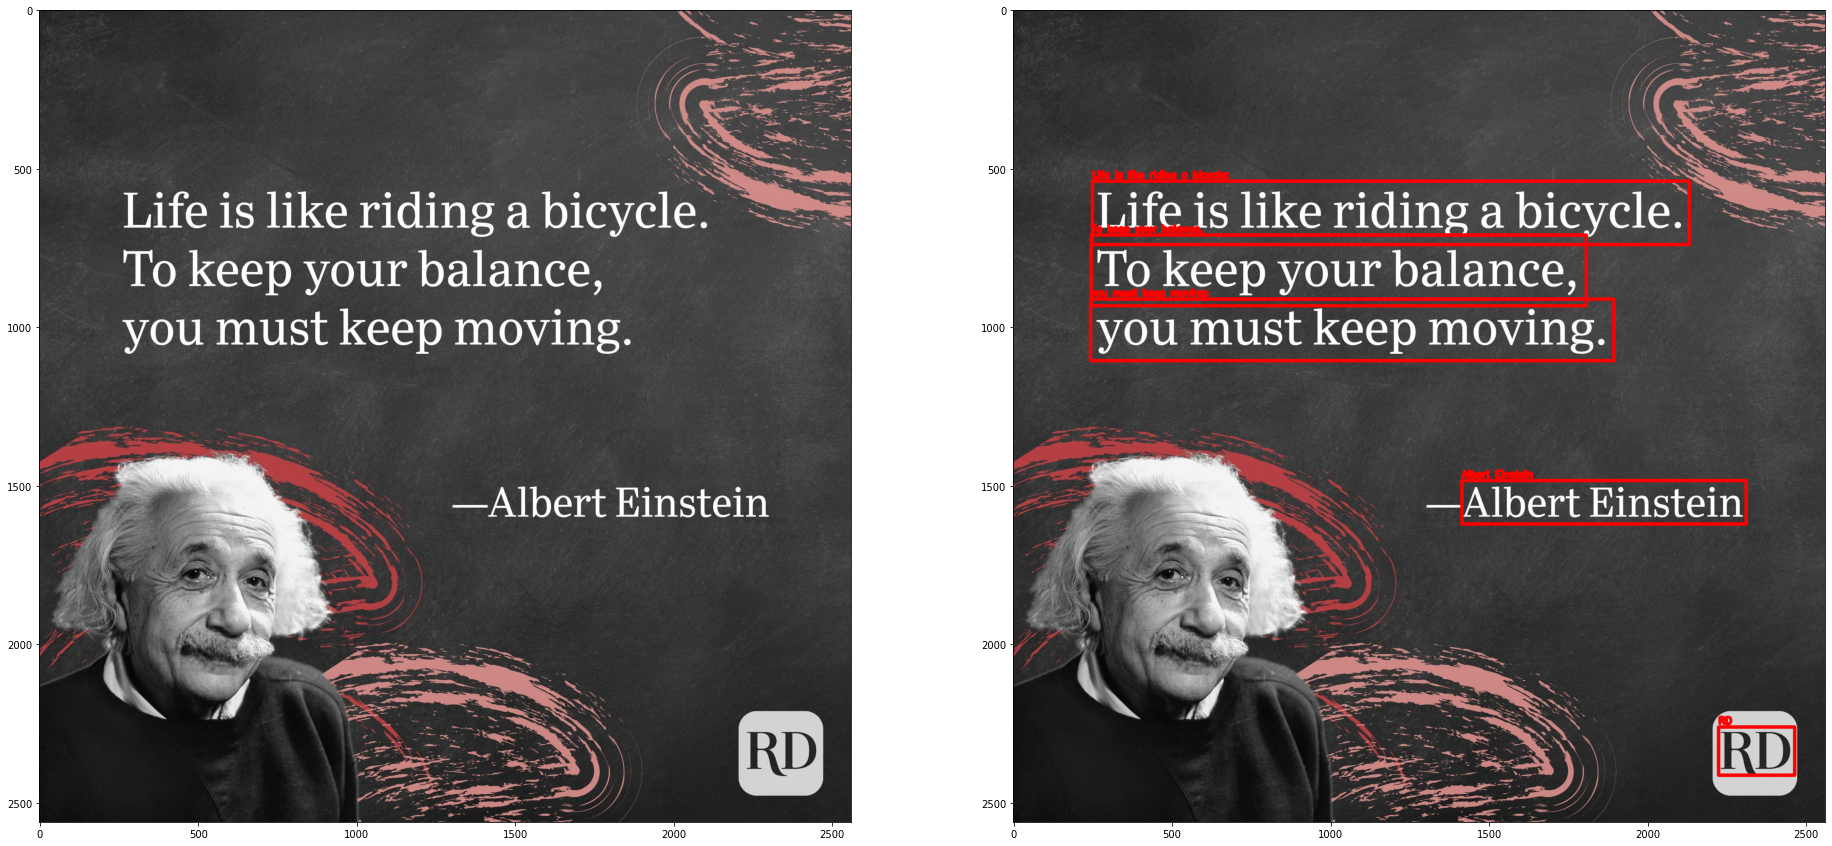

In [11]:
overlay_ocr_text(im_1_path, 'image1')

In [12]:
result = recognize_text(im_5_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

NameError: name 'im_5_path' is not defined

In [13]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()

NameError: name 'sentence' is not defined